In [47]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('bmh')
%matplotlib inline

pd.options.display.max_rows = 14

from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import Imputer
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import seaborn as sns
sns.set(style="ticks")
import warnings
warnings.filterwarnings('ignore')


**Description:**
 * Titanic dataset describes the survival status of individual passengers on the Titanic.
 * passengerID
    * survived -- Survival (0 = No; 1 = Yes)
    * Pclass -- Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
    * name -- name of the passenger
    * sex -- Sex
    * age -- Age
    * sibsp -- Number of Siblings/Spouses Aboard
    * parch -- Number of Parents/Children Aboard
    * Ticket -- Ticket number
    * fare -- Passenger Fare (British pound)
    * cabin -- cabin
    * embarked -- Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

In [2]:
# loading the dataset from the csv file
titanic = pd.read_csv('train.csv')
titanic.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

# Explore the data

In [3]:
titanic.shape

# dataset contains 891 rows and 12 columns

(891, 12)

In [4]:
# cheking null values

titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
# columns having null values are age,Cabin,Embarked

# filling the nans with the values

In [6]:
median=titanic['Age'].median()
titanic['Age'].fillna(median,inplace=True)

# age column which is having nulls is filled  with the median of that column

In [7]:
titanic.describe(include=['object'])

Name   Sex  Ticket    Cabin Embarked
count                                891   891     891      204      889
unique                               891     2     681      147        3
top     Gronnestad, Mr. Daniel Danielsen  male  347082  B96 B98        S
freq                                   1   577       7        4      644

In [8]:
titanic['Embarked'].fillna('S',inplace=True)

# Embarked column is filled with top value(i.e.., most frequently used value) where it is having nulls

In [9]:
titanic1=titanic.drop(['Name','Cabin','Ticket'], axis=1)

# Cabin column is droped because it has 689 nulls
# Name and Ticket columns are droped because they doesnt show any effect on the target

In [10]:
titanic1=titanic1.set_index('PassengerId')

# passengerID is set as a index column

In [11]:
titanic1.head()

Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
PassengerId                                                                
1                   0       3    male  22.0      1      0   7.2500        S
2                   1       1  female  38.0      1      0  71.2833        C
3                   1       3  female  26.0      0      0   7.9250        S
4                   1       1  female  35.0      1      0  53.1000        S
5                   0       3    male  35.0      0      0   8.0500        S

# Seabornplots

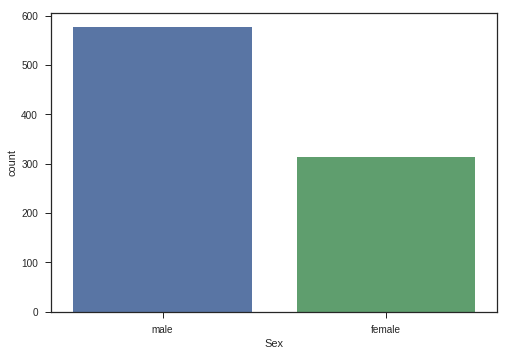

In [12]:
x= sns.countplot(x="Sex",data=titanic)

# we can count no of male and female passengers present in the boat
   # male = 591
   # female = 300

In [13]:
p1=titanic.groupby('Sex')['Survived'].sum()
p2=titanic.groupby('Sex').size()
p = (p1/p2) * 100
p.name = 'values'
p = p.reset_index()
p

Sex     values
0  female  74.203822
1    male  18.890815

In [14]:
p1 = titanic.groupby('Embarked')['Survived'].sum()
p2 = titanic.groupby('Embarked').size()
Q = (p1/p2)*100
Q.name = 'values'
Q = Q.reset_index()
Q

Embarked     values
0        C  55.357143
1        Q  38.961039
2        S  33.900929

In [15]:
p1 = titanic.groupby('Pclass')['Survived'].sum()
p2 = titanic.groupby('Pclass').size()
R = (p1/p2)*100
R.name = 'values'
R = R.reset_index()
R

Pclass     values
0       1  62.962963
1       2  47.282609
2       3  24.236253

In [16]:
# % of the people alived in the Categories

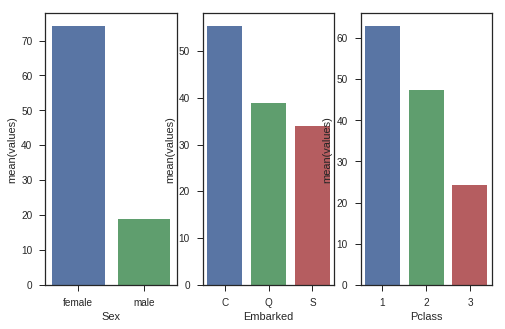

In [17]:
fig,x=plt.subplots(1,3,figsize=(8,5))
a = sns.barplot(x='Sex',y='values',data=p, ax=x[0])
y = sns.barplot(x='Embarked',y='values',data=Q, ax=x[1])
z = sns.barplot(x='Pclass',y='values',data=R, ax=x[2])


In [18]:
# from the above plot we can see the percentage(%) of the people survived in each category
#  female --- 74.203822
#  male   --- 18.890815  

# majority of the female are alived compared to male

# Most of the people alive in the class 1(62.962963)and in C Embarkation(55.357143)

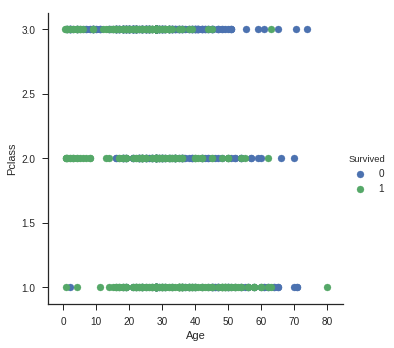

In [19]:
a=sns.FacetGrid(titanic,hue='Survived',size=5,aspect=1)
a=a.map(plt.scatter,'Age','Pclass')
a=a.add_legend()

In [20]:
# by this plot we can conclude that most of the people in class 1 are alive

In [21]:
corr=titanic.corr()
corr

PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.034212 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.064910 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.339898  0.083081  0.018443   
Age             0.034212 -0.064910 -0.339898  1.000000 -0.233296 -0.172482   
SibSp          -0.057527 -0.035322  0.083081 -0.233296  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.172482  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.096688  0.159651  0.216225   

                 Fare  
PassengerId  0.012658  
Survived     0.257307  
Pclass      -0.549500  
Age          0.096688  
SibSp        0.159651  
Parch        0.216225  
Fare         1.000000

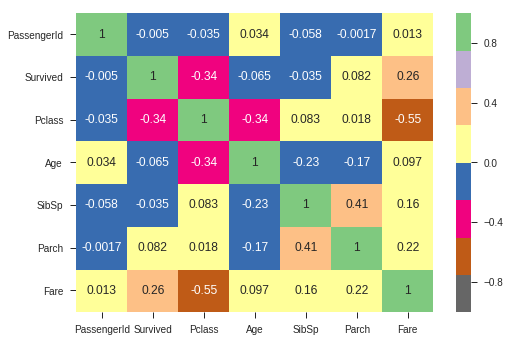

In [22]:
x=sns.heatmap(corr,annot=True,cmap = 'Accent_r')
plt.show()

In [27]:
from biokit.viz import corrplot

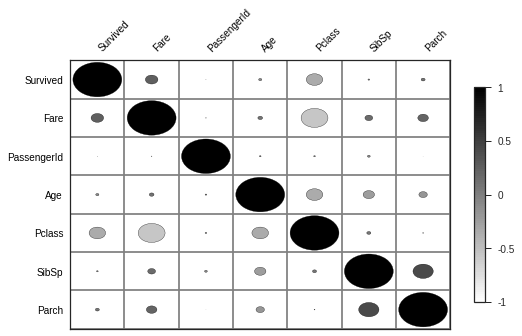

In [57]:
c = titanic.corr()
d = corrplot.Corrplot(c)
fig, ax = plt.subplots(figsize=(8,5))
d.plot(method='circle',cmap=('white','black'),ax=ax,fontsize=10,rotation=45)

In [22]:
# correlation between the  each feature with the other
#          Feature               Mostly correlated with
#    1.passengerId                 Age(0.034)
#    2.Survived                    Fare(0.26)
#    3.Pclass                      Sibsp(0.083)
#    4.Age                         Fare(0.097)
#    5.Sibsp                       Parch(0.41)
#    6.Parch                       Sibsp(0.41)
#    7.Fare                        Survived(0.26)

In [23]:
# splitting the data into training and test set

import sklearn.model_selection as ms
rn_train_set, rn_test_set = ms.train_test_split(titanic1, test_size = 0.1, random_state=42)  
rn_train_set.shape
rn_test_set.shape

# Data is split as 90% of train data and 10% of test data

(801, 8)

(90, 8)

# Transform the data

In [24]:
# Split the training data set into features and labels

features = rn_train_set.drop('Survived', axis=1)
labels = rn_train_set.Survived.copy()
features.shape
labels.shape

(801, 7)

(801,)

In [288]:
numeric_cols =list(features.drop(['Sex','Embarked'],axis=1))
categorical_cols = ['Sex','Embarked']

# here numerical data and categorical data are separted
# categorical data can be repesented in numbers using Encoder

In [26]:
%run 'CategoricalEncoder.py.ipynb'
%run 'class.py.ipynb'
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import StandardScaler

numeric_cols_pipeline = Pipeline([('selector', ColumnSelector(numeric_cols)),
                                  ('standard_scaler', StandardScaler())
                                 ])
categorical_cols_pipeline = Pipeline([('selector', ColumnSelector(categorical_cols)),
                                      ('encoder', CategoricalEncoder(encoding='onehot-dense'))
                                     ])

full_pipeline = FeatureUnion(transformer_list=[('numeric_pipeline', numeric_cols_pipeline),
                                               ('categorical_pipeline', categorical_cols_pipeline)
                                              ])

In [284]:
titanic_transformed = full_pipeline.fit_transform(rn_train_set)
titanic_transformed

array([[ 0.82096936, -1.56203526, -0.47096355, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.82096936, -1.56203526,  3.07121298, ...,  0.        ,
         0.        ,  1.        ],
       [-1.59222865,  2.42028858, -0.47096355, ...,  0.        ,
         0.        ,  1.        ],
       ..., 
       [ 0.82096936,  0.88862556,  1.30012472, ...,  0.        ,
         0.        ,  1.        ],
       [-1.59222865, -1.17911951,  0.41458059, ...,  0.        ,
         0.        ,  1.        ],
       [-1.59222865, -0.64303745, -0.47096355, ...,  0.        ,
         0.        ,  1.        ]])

# Explore different models

In [280]:
def measure(clf,a,b):
    y_ps = cross_val_predict(clf, a, b, cv=3)
    p_s=precision_score(b, y_ps)
    r_s=recall_score(b, y_ps)
    f_s=f1_score(b, y_ps)
    return p_s,r_s,f_s

In [272]:
sgd_clf = SGDClassifier(random_state=42)
x = sgd_clf.fit(titanic_transformed,labels)
y_ps = cross_val_predict(sgd_clf, titanic_transformed,labels, cv=3)
confusion_matrix(labels,y_ps)
measure(sgd_clf, titanic_transformed,labels)

array([[354, 141],
       [ 90, 216]])

(0.60504201680672265, 0.70588235294117652, 0.65158371040723984)

In [273]:
forest_clf = RandomForestClassifier(random_state=42)
x = forest_clf.fit(titanic_transformed,labels)
y_ps = cross_val_predict(forest_clf, titanic_transformed,labels, cv=3)
confusion_matrix(labels,y_ps)
measure(forest_clf, titanic_transformed,labels)

array([[425,  70],
       [ 99, 207]])

(0.74729241877256314, 0.67647058823529416, 0.71012006861063459)

In [274]:
GNB = GaussianNB()
x = GNB.fit(titanic_transformed,labels)
y_ps = cross_val_predict(GNB, titanic_transformed,labels, cv=3)
confusion_matrix(labels,y_ps)
measure(GNB, titanic_transformed,labels)

array([[413,  82],
       [ 88, 218]])

(0.72666666666666668, 0.71241830065359479, 0.71947194719471952)

In [275]:
svc_clf=SVC()
x = svc_clf.fit(titanic_transformed,labels)
y_ps = cross_val_predict(svc_clf, titanic_transformed,labels, cv=3)
confusion_matrix(labels,y_ps)
measure(svc_clf, titanic_transformed,labels)

array([[443,  52],
       [ 89, 217]])

(0.80669144981412644, 0.70915032679738566, 0.75478260869565228)

In [289]:
# among all the models svc classifier has good precision( 0.80669144981412644),recall(0.70915032679738566) and f1_scores(0.75478260869565228) values

In [257]:
# splitting the test data into features and labels

X_test = rn_test_set.drop('Survived', axis=1)
y_test = rn_test_set['Survived'].copy()

# Gridsearch

In [329]:
from sklearn.model_selection import GridSearchCV

param_grid = [{'C':[1,2],'kernel':['linear','rbf'],'gamma':[1,2,3,4]}]
svc_clf1=SVC(random_state=42)
grid_search = GridSearchCV(svc_clf1, param_grid, cv=5, scoring='neg_mean_squared_error',n_jobs=4)
x = grid_search.fit(titanic_transformed,labels)
grid_search.best_params_

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}

In [330]:
grid_search.best_estimator_

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)

In [400]:
final_model = grid_search.best_estimator_
predictions = final_model.predict(titanic_transformed)
measure(final_model, titanic_transformed,labels)

(0.80321285140562249, 0.65359477124183007, 0.72072072072072069)

In [398]:
final_model = grid_search.best_estimator_
X_test_transformed = full_pipeline.transform(X_test)
predictions = final_model.predict(X_test_transformed)

precision_score(y_test,predictions)
recall_score(y_test,predictions)
f1_score(y_test,predictions)

0.7567567567567568

0.77777777777777779

0.76712328767123283

In [566]:
# Precision,recall,f1_score -----> 0.80321285140562249, 0.65359477124183007, 0.72072072072072069 (for train set)
# Precision,recall,f1_score ----->0.756756756756756,  0.77777777777777779, 0.76712328767123283(for test set)


# RandomSearch

In [312]:
from scipy.stats import randint
param_grid = {'C':randint(1,3),'kernel':['linear','poly','rbf'],'gamma':randint(1,10)}
svc_clf3=SVC(random_state=42)
random_search =  RandomizedSearchCV(svc_clf3, param_grid,cv=3,n_jobs=4)
x = random_search.fit(titanic_transformed,labels)
random_search.best_params_

{'C': 1, 'gamma': 5, 'kernel': 'poly'}

In [314]:
random_search.best_estimator_

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=5, kernel='poly',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)

In [399]:
final_model1 =random_search.best_estimator_
predictions = final_model1.predict(titanic_transformed)
measure(final_model1, titanic_transformed,labels)

(0.76029962546816476, 0.66339869281045749, 0.70855148342059338)

In [396]:
final_model1 =random_search.best_estimator_
X_test_transformed = full_pipeline.transform(X_test)
predictions = final_model1.predict(X_test_transformed)

precision_score(y_test,predictions)
recall_score(y_test,predictions)
f1_score(y_test,predictions)

0.69047619047619047

0.80555555555555558

0.74358974358974361

In [567]:
# precisoin,recall,f1_score ----> (0.76029962546816476, 0.66339869281045749, 0.70855148342059338) (for train set)
# precisoin,recall,f1_score ----> (0.69047619047619047,0.80555555555555558,0.74358974358974361) (for train set)